In [ ]:
# test LJC

In [ ]:
pip install pyreadstat

In [40]:
import pyreadstat
import os
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
root_folder = r'C:\Users\Annii\Documents\HL\Study\UChicago\24 Winter\122\project\L'

In [21]:
dfs = []

for filename in os.listdir(root_folder):
    
    if filename.endswith('.sav'):
        
        file_path = os.path.join(root_folder, filename)
        df, _ = pyreadstat.read_sav(file_path)
        dfs.append(df)


all_data = pd.concat(dfs, ignore_index=True)

In [26]:
all_data

,caseid,date,CE_rating,gender,agegp,weight
0,1.0,20220704.0,50.0,1.0,5.0,1.274059
2,3.0,20220704.0,50.0,2.0,-99.0,0.400000
3,4.0,20220704.0,100.0,2.0,5.0,0.574312
4,5.0,20220704.0,100.0,2.0,6.0,0.425659
5,6.0,20220704.0,50.0,2.0,5.0,0.456223
...,...,...,...,...,...,...
18847,665.0,20240111.0,50.0,2.0,6.0,0.704902
18848,666.0,20240111.0,80.0,2.0,5.0,1.595427
18849,667.0,20240111.0,100.0,2.0,2.0,1.374250
18850,668.0,20240111.0,50.0,1.0,2.0,0.833054


In [25]:
all_data = all_data[all_data['CE_rating'] <= 100]

In [35]:
#rating by date
rating_by_date= all_data[['date', 'CE_rating']].groupby('date').mean()

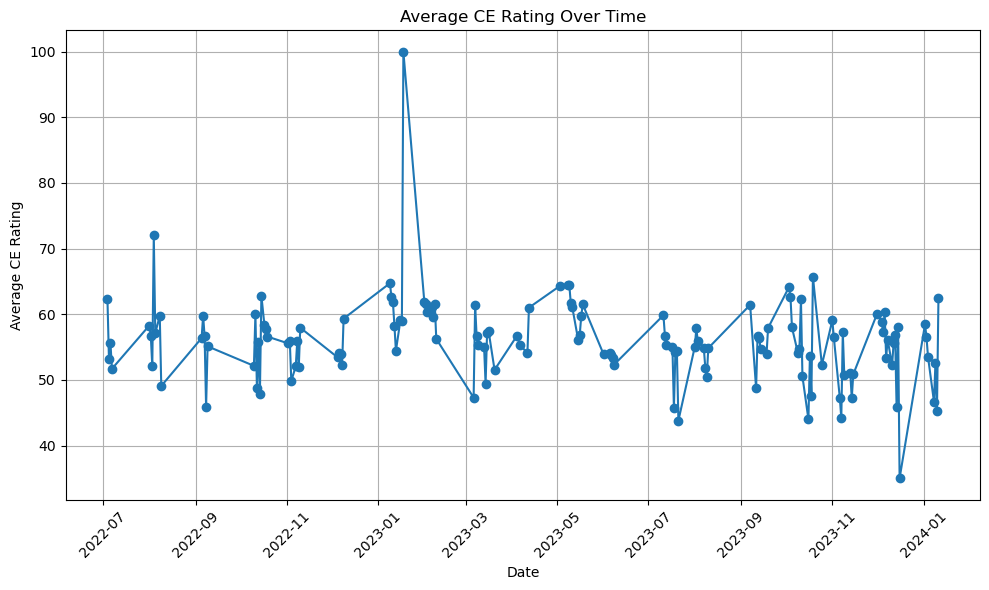

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(a.index, a['CE_rating'], marker='o', linestyle='-')
plt.title('Average CE Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average CE Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
#rating by month

In [56]:
slected = all_data[['date', 'CE_rating']]
slected.loc[:,'date'] = all_data['date'].astype(int)
slected.loc[:,'date'] = all_data['date'].astype(str)
slected.loc[:,'date'] = pd.to_datetime(slected['date'], format='%Y%m%d')

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [87]:
slected.loc[:,'date'] = pd.to_datetime(slected['date'], format='%Y%m%d.%f')
#df_copy = slected.copy()

In [88]:
slected['month'] = slected['date'].dt.to_period('M')

In [90]:
monthly_avg = slected.groupby('month').mean()

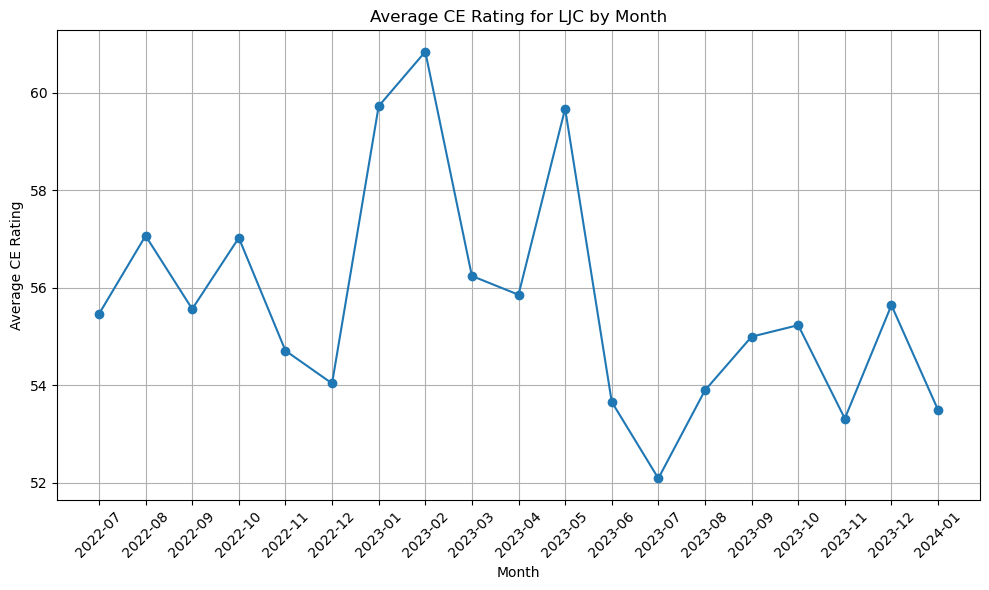

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index.astype(str), monthly_avg['CE_rating'], marker='o', linestyle='-')
plt.title('Average CE Rating for LJC by Month')
plt.xlabel('Month')
plt.ylabel('Average CE Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#by gender

In [97]:
slected['gender'] = all_data['gender']

In [115]:
slected = slected.drop('date', axis = 1)

In [116]:
grouped_data = slected.groupby(['month', 'gender']).mean().unstack()

In [ ]:
grouped_data

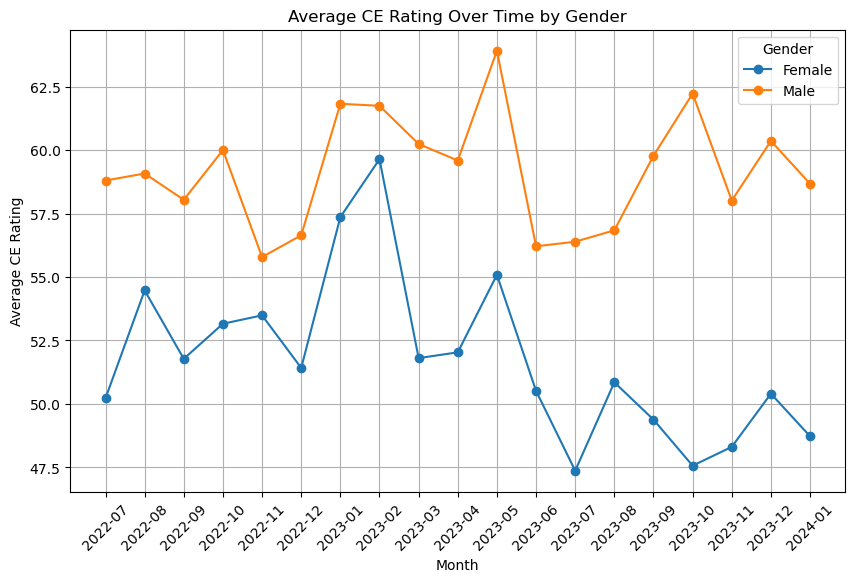

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index.astype(str), grouped_data['CE_rating'], marker='o', linestyle='-')
plt.title('Average CE Rating Over Time by Gender')
plt.xlabel('Month')
plt.ylabel('Average CE Rating')
plt.legend(title='Gender', labels={'Female': '2.0', 'Male': '1.0'})
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [130]:
# by age group
slected['age'] = all_data['agegp']
slected = slected.drop('gender', axis = 1)


In [132]:
slected = slected[slected['age'] >= 0]

In [133]:
grouped_data = slected.groupby(['month', 'age']).mean().unstack()

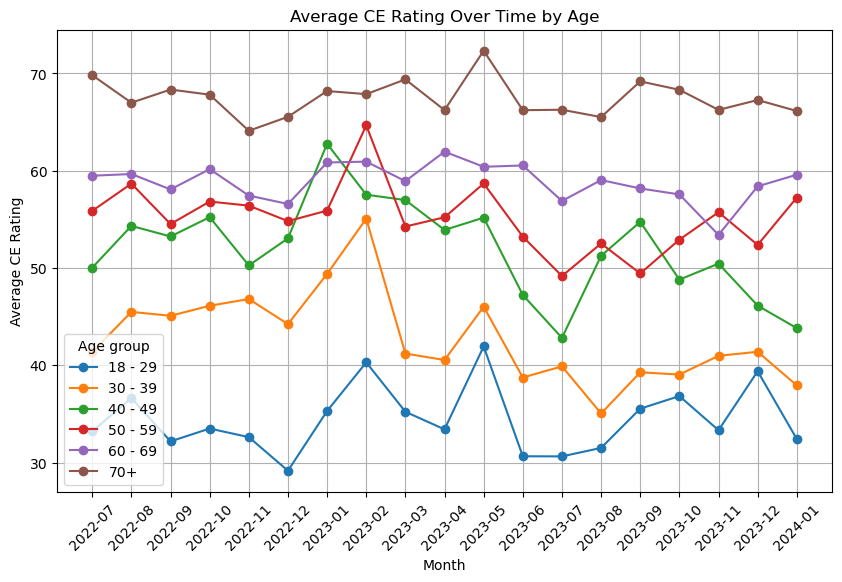

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index.astype(str), grouped_data['CE_rating'], marker='o', linestyle='-')
plt.title('Average CE Rating Over Time by Age')
plt.xlabel('Month')
plt.ylabel('Average CE Rating')
plt.legend(title='Age group', labels={'18 - 29': 1.0, '30 - 39': 2.0, 
'40 - 49': 3.0, '50 - 59': 4.0, '60 - 69': 5.0, '70+': 6.0})
plt.grid(True)
plt.xticks(rotation=45)
plt.show()